In [1]:
import pandas as pd
import  numpy as np

In [2]:
ads_data=pd.read_csv(r'F:\Lessons\lesson6\ads_data.csv', sep=',')


In [3]:
ads_data_tmp=ads_data.groupby(['event', 'ad_id'], as_index=False).agg({'client_union_id':'count'}) #Либо можно сгруппировать по типу события,посчитать сумму, разделить на число всех реклам и округлить


date                 time event platform   ad_id  client_union_id  \
0 2019-04-01  2019-04-01 00:00:48  view  android   45061            34734   
1 2019-04-01  2019-04-01 00:00:48  view      web  121288           121288   
2 2019-04-01  2019-04-01 00:01:03  view  android  102737           102535   
3 2019-04-01  2019-04-01 00:01:03  view  android  107564           106914   
4 2019-04-01  2019-04-01 00:01:09  view  android    4922               37   
5 2019-04-01  2019-04-01 00:01:09  view      web   10325              107   

   campaign_union_id ad_cost_type  ad_cost  has_video  target_audience_count  
0              45061          CPM    200.6          0                1955269  
1             121288          CPM    187.4          0                 232011  
2             102564          CPC     60.7          0                   4410  
3             107564          CPM    217.3          0                  62711  
4               4400          CPC     60.1          0                1183501  
5              10325          CPM    211.7          0                  20779

In [4]:
ads_data_temp=ads_data_tmp.pivot(index='ad_id', columns='event', values='client_union_id')



event  click   view
ad_id              
2        1.0  101.0
3        3.0  184.0

In [5]:
ads_data_temp.describe()

event          click           view
count     525.000000     956.000000
mean      207.958095     931.822176
std      4615.836969   13006.492754
min         1.000000      10.000000
25%         1.000000      36.000000
50%         2.000000      84.000000
75%         5.000000     209.250000
max    105767.000000  351802.000000

In [22]:
temp=ads_data_temp.query("view !=0")
ax=np.log(temp.view)

F:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


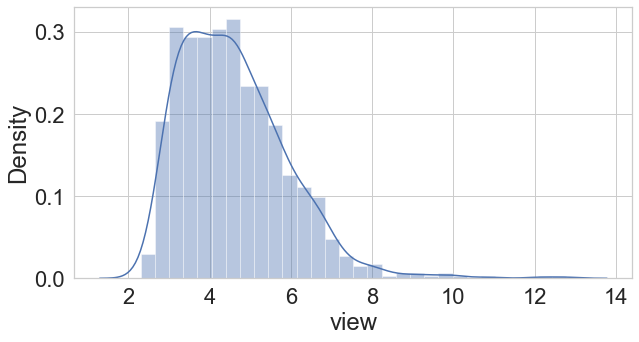

In [23]:
import seaborn as sns
graf=sns.distplot(ax)
sns.set(font_scale=2,
    style="whitegrid",
    rc={'figure.figsize':(10,5)}
        )

In [20]:
tmp=ads_data_tmp.query("event=='view'").groupby(['ad_id','date'], as_index=False).agg({'client_union_id': 'count'})
tmp

ad_id       date  client_union_id
0          2 2019-04-01               83
1          2 2019-04-02               18
2          3 2019-04-01              158
3          3 2019-04-02               26
4       1902 2019-04-03               34
...      ...        ...              ...
1926  122023 2019-04-05               15
1927  122031 2019-04-05              119
1928  122031 2019-04-06               19
1929  122078 2019-04-03               36
1930  122078 2019-04-04                6

[1931 rows x 3 columns]

In [22]:
tmp=tmp.groupby('date', as_index=False).agg({'client_union_id': 'mean'})
tmp

date  client_union_id
0 2019-04-01       154.482270
1 2019-04-02       137.786982
2 2019-04-03       163.952778
3 2019-04-04       675.901720
4 2019-04-05       919.109677
5 2019-04-06       277.122727

In [29]:
tmp_roll=tmp.client_union_id.rolling(2).mean()
tmp_roll

0           NaN
1    146.134626
2    150.869880
3    419.927249
4    797.505699
5    598.116202
Name: client_union_id, dtype: float64

In [12]:
abs(tmp.client_union_id-tmp_roll)

date
2019-04-01           NaN
2019-04-02      8.347644
2019-04-03     13.082898
2019-04-04    255.974471
2019-04-05    121.603979
2019-04-06    320.993475
Name: client_union_id, dtype: float64

<AxesSubplot:xlabel='date', ylabel='client_union_id'>

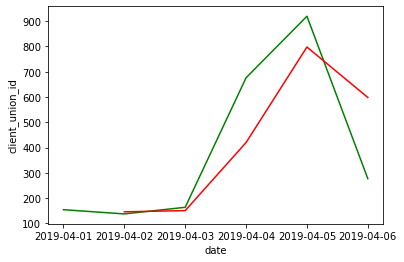

In [42]:
import seaborn as sns
sns.lineplot(x=tmp.date, y=tmp.client_union_id, data=tmp, color= "green")
sns.lineplot(x=tmp.date, y=tmp_roll, data=tmp_roll, color= "red")

In [3]:
ads_clients_data=pd.read_csv(r'F:\Lessons\lesson6\ads_clients_data.csv', sep=',')


In [4]:
itog_data=ads_clients_data.merge(ads_data, how='inner', on='client_union_id')
itog_data.rename(columns ={'date_x': 'date_client', 'date_y':'date_ads'}, inplace=True)


In [5]:
itog_data['long']=pd.to_datetime(itog_data.date_ads) - pd.to_datetime(itog_data.create_date)


In [7]:
itog_data_client=itog_data.groupby('client_union_id').agg({'long':'min'})

In [8]:
itog_data_client.mean()

long   124 days 09:04:43.532219570
dtype: timedelta64[ns]

In [6]:
year=pd.Timedelta(365, unit='d')


In [7]:
itog_data.query("long < @year")

ValueError: unknown type object